In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import new_lib as nl
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_fwf('auto-mpg.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [8]:
df.columns = ['mpg', 'cylinders', 'displace', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']
df.head()

,mpg,cylinders,displace,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [9]:
df.shape

(398, 9)

In [17]:
df[df['horsepower'] == '?']

,mpg,cylinders,displace,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


In [31]:
df.horsepower = df.horsepower[df.horsepower != '?']

In [32]:
df.horsepower = df.horsepower.astype(float)

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

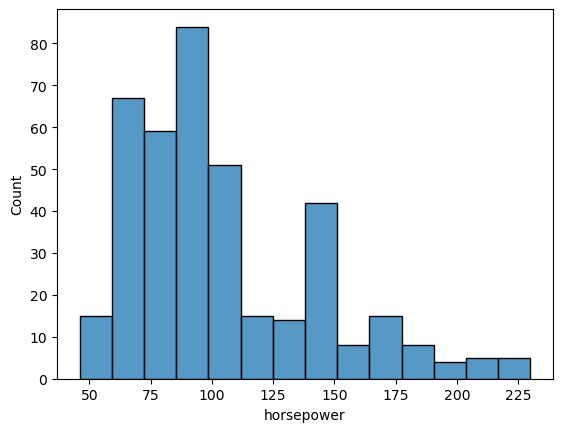

In [33]:
sns.histplot(df.horsepower)

# Min-max scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
mmscaler = MinMaxScaler()

In [50]:
train, test = train_test_split(df, train_size = .7, random_state = 77)

In [51]:
mmscaler.fit(train[['horsepower']])

MinMaxScaler()

In [53]:
mmhorsepower = mmscaler.transform(train[['horsepower']])

In [54]:
train['horsepower']

83      80.0
365     88.0
326     48.0
378     63.0
310     60.0
       ...  
293     71.0
235     75.0
84      88.0
95     225.0
215    150.0
Name: horsepower, Length: 278, dtype: float64

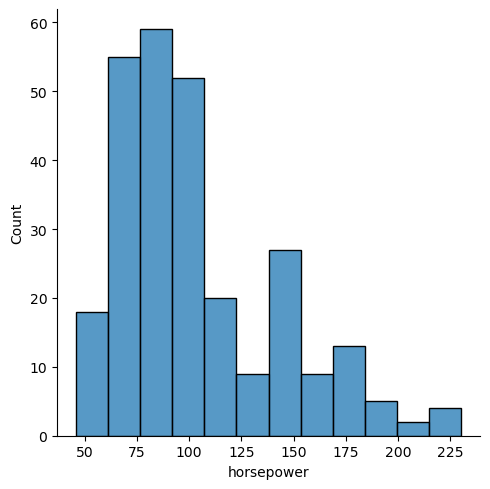

In [56]:
sns.displot(train.horsepower)

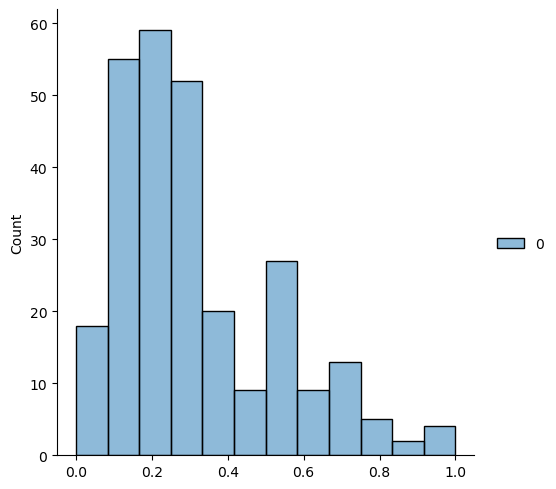

In [57]:
sns.displot(mmhorsepower)

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
ss_scaler = StandardScaler()

In [60]:
ss_scaler.fit(train[['horsepower']])

StandardScaler()

In [61]:
ss_horsepower = ss_scaler.transform(train[['horsepower']])
ss_horsepower

array([[-0.61840088],
       [-0.411192  ],
       [-1.44723644],
       [-1.05871977],
       [-1.1364231 ],
       [ 1.19467688],
       [-0.67020311],
       [-0.411192  ],
       [ 0.85796244],
       [ 0.21043467],
       [-1.49903866],
       [-1.34363199],
       [ 1.84220466],
       [ 1.16877577],
       [-0.51479644],
       [ 1.97171021],
       [-0.48889533],
       [ 0.90976466],
       [-0.411192  ],
       [-0.411192  ],
       [-0.411192  ],
       [-0.15218089],
       [-0.178082  ],
       [-0.411192  ],
       [-0.87741199],
       [-0.87741199],
       [-1.03281866],
       [-0.56659866],
       [ 0.02912689],
       [-0.35938977],
       [-0.77380755],
       [-0.87741199],
       [-0.82560977],
       [ 2.43793021],
       [-0.77380755],
       [-0.67020311],
       [-0.35938977],
       [ 1.45368799],
       [-1.00691755],
       [ 3.00775465],
       [        nan],
       [-0.10037866],
       [-0.87741199],
       [-0.10037866],
       [ 0.15863245],
       [ 1

Text(0.5, 1.0, 'Transformed data')

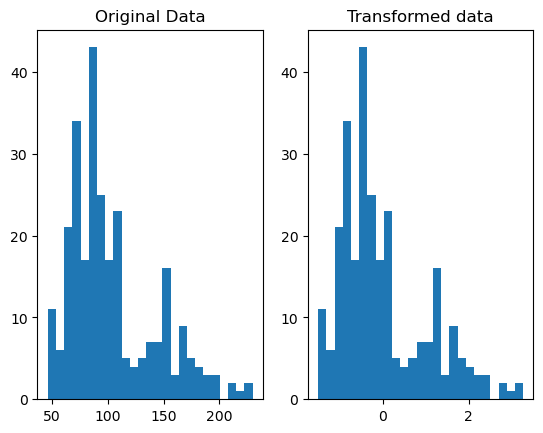

In [62]:
plt.subplot(121)
plt.hist(train['horsepower'], bins = 25)
plt.title('Original Data')

plt.subplot(122)
plt.hist(ss_horsepower, bins = 25)
plt.title('Transformed data')

In [64]:
from sklearn.preprocessing import RobustScaler

In [65]:
r_scaler = RobustScaler()

In [66]:
r_scaler.fit(train[['horsepower']])

RobustScaler()

In [67]:
r_horsepower = r_scaler.transform(train[['horsepower']])
r_horsepower

array([[-0.24],
       [-0.08],
       [-0.88],
       [-0.58],
       [-0.64],
       [ 1.16],
       [-0.28],
       [-0.08],
       [ 0.9 ],
       [ 0.4 ],
       [-0.92],
       [-0.8 ],
       [ 1.66],
       [ 1.14],
       [-0.16],
       [ 1.76],
       [-0.14],
       [ 0.94],
       [-0.08],
       [-0.08],
       [-0.08],
       [ 0.12],
       [ 0.1 ],
       [-0.08],
       [-0.44],
       [-0.44],
       [-0.56],
       [-0.2 ],
       [ 0.26],
       [-0.04],
       [-0.36],
       [-0.44],
       [-0.4 ],
       [ 2.12],
       [-0.36],
       [-0.28],
       [-0.04],
       [ 1.36],
       [-0.54],
       [ 2.56],
       [  nan],
       [ 0.16],
       [-0.44],
       [ 0.16],
       [ 0.36],
       [ 1.36],
       [ 0.06],
       [ 0.06],
       [ 2.12],
       [-0.6 ],
       [ 0.86],
       [-0.12],
       [ 1.56],
       [-0.8 ],
       [ 0.26],
       [ 1.06],
       [-0.3 ],
       [ 1.16],
       [ 0.26],
       [-0.34],
       [ 1.16],
       [ 0.1 ],
       [

Text(0.5, 1.0, 'Transformed data')

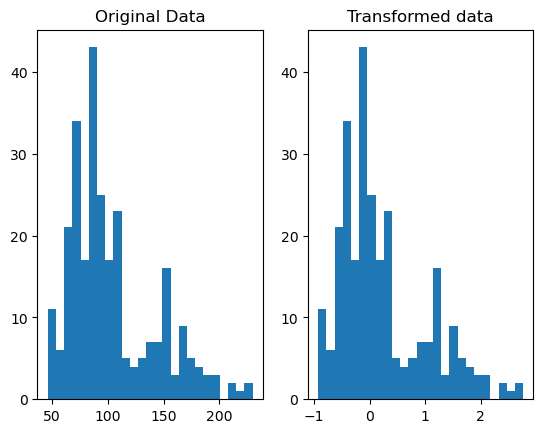

In [68]:
plt.subplot(121)
plt.hist(train['horsepower'], bins = 25)
plt.title('Original Data')

plt.subplot(122)
plt.hist(r_horsepower, bins = 25)
plt.title('Transformed data')

In [73]:
r_scaler.fit(train[['horsepower', 'weight']])
dt = r_scaler.transform(train[['horsepower', 'weight']])
dt[:5]

array([[-0.24      , -0.48705621],
       [-0.08      ,  0.17566568],
       [-0.88      , -0.36057692],
       [-0.58      , -0.51590237],
       [-0.64      , -0.63202663]])